In [37]:
import requests
import json
import pandas as pd
import pycountry
import folium

## Get Fab Labs data

In [2]:
url = "https://api.fablabs.io/0/labs.json"
r = requests.get(url)

In [3]:
COUNTRY_CODES = [ "AT", "BE", "BG", "CH", "CY", "CZ", "DE", "DK", "EE", "ES", "FI", "FR", "GB", "GR", "HR", "HU", "IE", "IS", "IT", "LT", "LU", "LV", "MT", "NO", "NL", "PL", "PT", "RO", "SE", "SI", "SK"]
len(COUNTRY_CODES)

31

In [4]:
df = pd.DataFrame(r.json())

In [5]:
df.columns

Index(['id', 'name', 'kind_name', 'parent_id', 'blurb', 'description', 'slug',
       'avatar_url', 'header_url', 'address_1', 'address_2', 'city', 'county',
       'postal_code', 'country_code', 'latitude', 'longitude', 'address_notes',
       'phone', 'email', 'capabilities', 'activity_status', 'links'],
      dtype='object')

In [6]:
df[df['country_code'].isin(COUNTRY_CODES)]

,id,name,kind_name,parent_id,blurb,description,slug,avatar_url,header_url,address_1,...,postal_code,country_code,latitude,longitude,address_notes,phone,email,capabilities,activity_status,links
1,17,PiNG,fab_lab,NaN,None,None,ping,None,None,None,...,44000,FR,47.218371,-1.553621,None,None,None,[],None,"[{'id': 52, 'url': 'http://fablab.pingbase.net'}]"
2,20,FabLab INSA Strasbourg,fab_lab,NaN,None,None,fablabinsastrasbourg,None,None,None,...,67000,FR,48.583148,7.747882,None,None,None,[],None,"[{'id': 55, 'url': 'http://www.ideaslab.fr'}]"
5,776,Fab Lab Lleida,fab_lab,NaN,Help the community around us to develop social...,We are looking for a location for our lab.,fablablleida,http://fablabs.io.s3.amazonaws.com/2017/01/28/...,None,,...,,ES,41.623023,0.625864,,+34 660493352,fablablleida@gmail.com,"[three_d_printing, cnc_milling, circuit_produc...",planned,"[{'id': 2145, 'url': 'http://www.fablablleida...."
13,2744,Icelandic Textile Center,fab_lab,NaN,"The first of its kind in Iceland, the TextileL...","On May 21, 2021, the Textile Center's TextileL...",icelandictextilecenter,http://fablabs.io.s3.amazonaws.com/2023/06/06/...,http://fablabs.io.s3.amazonaws.com/2023/06/06/...,Þverbraut 1,...,540,IS,65.661713,-20.291235,"1. floor, door to the left",+354 452 4030,textilelab@textilmidstod.is,"[three_d_printing, laser, vinyl_cutting]",active,"[{'id': 41885, 'url': 'https://www.instagram.c..."
19,2390,ZEBRA3-SculptureClub,fab_lab,NaN,"Artist, designer, scenographer, architect, stu...","A space for production and experimentation, th...",zebra3,None,None,10 Quai de Brazza,...,33100,FR,NaN,NaN,,0607705390,sculpture.club@zebra3.org,"[three_d_printing, cnc_milling, precision_mill...",active,"[{'id': 32901, 'url': 'https://www.zebra3.org/..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2352,La Fabrique Multimedia,fab_lab,254.0,It's made up of a multimedia space used for le...,La Fabrique Multimédia se compose d’un Espace ...,lafabriquemultimedia,http://fablabs.io.s3.amazonaws.com/2020/12/03/...,None,1 Place Saint-Jacques,...,80100,FR,50.108486,1.828927,,0670602256,numerique@mpt-abbeville.asso.fr,"[three_d_printing, cnc_milling, laser, vinyl_c...",active,"[{'id': 22766, 'url': 'https://www.instagram.c..."
2619,2331,FabLab_du_Rocher,fab_lab,NaN,"A FabLab in the center of Paris (France), dedi...","A FabLab in the center of Paris (France), dedi...",fablabdurocher,http://fablabs.io.s3.amazonaws.com/2020/11/01/...,http://fablabs.io.s3.amazonaws.com/2020/11/01/...,230 Rue du Faubourg Saint-Honoré,...,75008,FR,48.876448,2.303581,,+33180984657,fablab@coursdurocher.fr,"[three_d_printing, laser, vinyl_cutting]",active,"[{'id': 19805, 'url': 'http://www.petitcoursdu..."
2622,2336,Konk Ar Lab,fab_lab,1087.0,"Konk Ar Lab, le FabLab de la Baie, est un FabL...",Konk Ar Lab est une association loi 1901 créée...,konkarlab,http://fablabs.io.s3.amazonaws.com/2020/11/09/...,http://fablabs.io.s3.amazonaws.com/2021/01/18/...,2 Rue des Charmes,...,29900,FR,47.883560,-3.915601,,0256100304,contact@konkarlab.bzh,"[three_d_printing, cnc_milling, laser, vinyl_c...",active,"[{'id': 20556, 'url': 'https://www.konkarlab.b..."
2625,2348,Martigues'FabLab,fab_lab,228.0,Initié par les Espaces Publics Numériques de l...,Présentation en vidéo : https://dai.ly/x87kfi5...,martiguesFabLab,http://fablabs.io.s3.amazonaws.com/2020/11/24/...,http://fablabs.io.s3.amazonaws.com/2021/10/18/...,Quai Lucien Toulmond,...,13500,FR,43.405296,5.051129,EPN Maison de la Formation et de la Jeunesse,0442494598,epn@ville-martigues.fr,"[three_d_printing, laser, vinyl_cutting]",active,[]


In [7]:
len(sorted(set(list(df[df['country_code'].isin(COUNTRY_CODES)]['country_code']))))

31

In [8]:
set(list(df['activity_status']))

{'', None, 'active', 'closed', 'corona', 'planned'}

In [9]:
df[df['country_code'].isin(COUNTRY_CODES)]

,id,name,kind_name,parent_id,blurb,description,slug,avatar_url,header_url,address_1,...,postal_code,country_code,latitude,longitude,address_notes,phone,email,capabilities,activity_status,links
1,17,PiNG,fab_lab,NaN,None,None,ping,None,None,None,...,44000,FR,47.218371,-1.553621,None,None,None,[],None,"[{'id': 52, 'url': 'http://fablab.pingbase.net'}]"
2,20,FabLab INSA Strasbourg,fab_lab,NaN,None,None,fablabinsastrasbourg,None,None,None,...,67000,FR,48.583148,7.747882,None,None,None,[],None,"[{'id': 55, 'url': 'http://www.ideaslab.fr'}]"
5,776,Fab Lab Lleida,fab_lab,NaN,Help the community around us to develop social...,We are looking for a location for our lab.,fablablleida,http://fablabs.io.s3.amazonaws.com/2017/01/28/...,None,,...,,ES,41.623023,0.625864,,+34 660493352,fablablleida@gmail.com,"[three_d_printing, cnc_milling, circuit_produc...",planned,"[{'id': 2145, 'url': 'http://www.fablablleida...."
13,2744,Icelandic Textile Center,fab_lab,NaN,"The first of its kind in Iceland, the TextileL...","On May 21, 2021, the Textile Center's TextileL...",icelandictextilecenter,http://fablabs.io.s3.amazonaws.com/2023/06/06/...,http://fablabs.io.s3.amazonaws.com/2023/06/06/...,Þverbraut 1,...,540,IS,65.661713,-20.291235,"1. floor, door to the left",+354 452 4030,textilelab@textilmidstod.is,"[three_d_printing, laser, vinyl_cutting]",active,"[{'id': 41885, 'url': 'https://www.instagram.c..."
19,2390,ZEBRA3-SculptureClub,fab_lab,NaN,"Artist, designer, scenographer, architect, stu...","A space for production and experimentation, th...",zebra3,None,None,10 Quai de Brazza,...,33100,FR,NaN,NaN,,0607705390,sculpture.club@zebra3.org,"[three_d_printing, cnc_milling, precision_mill...",active,"[{'id': 32901, 'url': 'https://www.zebra3.org/..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2352,La Fabrique Multimedia,fab_lab,254.0,It's made up of a multimedia space used for le...,La Fabrique Multimédia se compose d’un Espace ...,lafabriquemultimedia,http://fablabs.io.s3.amazonaws.com/2020/12/03/...,None,1 Place Saint-Jacques,...,80100,FR,50.108486,1.828927,,0670602256,numerique@mpt-abbeville.asso.fr,"[three_d_printing, cnc_milling, laser, vinyl_c...",active,"[{'id': 22766, 'url': 'https://www.instagram.c..."
2619,2331,FabLab_du_Rocher,fab_lab,NaN,"A FabLab in the center of Paris (France), dedi...","A FabLab in the center of Paris (France), dedi...",fablabdurocher,http://fablabs.io.s3.amazonaws.com/2020/11/01/...,http://fablabs.io.s3.amazonaws.com/2020/11/01/...,230 Rue du Faubourg Saint-Honoré,...,75008,FR,48.876448,2.303581,,+33180984657,fablab@coursdurocher.fr,"[three_d_printing, laser, vinyl_cutting]",active,"[{'id': 19805, 'url': 'http://www.petitcoursdu..."
2622,2336,Konk Ar Lab,fab_lab,1087.0,"Konk Ar Lab, le FabLab de la Baie, est un FabL...",Konk Ar Lab est une association loi 1901 créée...,konkarlab,http://fablabs.io.s3.amazonaws.com/2020/11/09/...,http://fablabs.io.s3.amazonaws.com/2021/01/18/...,2 Rue des Charmes,...,29900,FR,47.883560,-3.915601,,0256100304,contact@konkarlab.bzh,"[three_d_printing, cnc_milling, laser, vinyl_c...",active,"[{'id': 20556, 'url': 'https://www.konkarlab.b..."
2625,2348,Martigues'FabLab,fab_lab,228.0,Initié par les Espaces Publics Numériques de l...,Présentation en vidéo : https://dai.ly/x87kfi5...,martiguesFabLab,http://fablabs.io.s3.amazonaws.com/2020/11/24/...,http://fablabs.io.s3.amazonaws.com/2021/10/18/...,Quai Lucien Toulmond,...,13500,FR,43.405296,5.051129,EPN Maison de la Formation et de la Jeunesse,0442494598,epn@ville-martigues.fr,"[three_d_printing, laser, vinyl_cutting]",active,[]


In [10]:
df[df['country_code'].isin(COUNTRY_CODES)][df['activity_status'] == 'active']

/tmp/ipykernel_3006467/2136754723.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['country_code'].isin(COUNTRY_CODES)][df['activity_status'] == 'active']


,id,name,kind_name,parent_id,blurb,description,slug,avatar_url,header_url,address_1,...,postal_code,country_code,latitude,longitude,address_notes,phone,email,capabilities,activity_status,links
13,2744,Icelandic Textile Center,fab_lab,NaN,"The first of its kind in Iceland, the TextileL...","On May 21, 2021, the Textile Center's TextileL...",icelandictextilecenter,http://fablabs.io.s3.amazonaws.com/2023/06/06/...,http://fablabs.io.s3.amazonaws.com/2023/06/06/...,Þverbraut 1,...,540,IS,65.661713,-20.291235,"1. floor, door to the left",+354 452 4030,textilelab@textilmidstod.is,"[three_d_printing, laser, vinyl_cutting]",active,"[{'id': 41885, 'url': 'https://www.instagram.c..."
19,2390,ZEBRA3-SculptureClub,fab_lab,NaN,"Artist, designer, scenographer, architect, stu...","A space for production and experimentation, th...",zebra3,None,None,10 Quai de Brazza,...,33100,FR,NaN,NaN,,0607705390,sculpture.club@zebra3.org,"[three_d_printing, cnc_milling, precision_mill...",active,"[{'id': 32901, 'url': 'https://www.zebra3.org/..."
20,2387,Le Nautilus / MicroFolie,mini_fab_lab,NaN,Un FabLab au sein du centre social de la ville...,Notre FabLab est intégré au sein de notre Micr...,lenautilus,http://fablabs.io.s3.amazonaws.com/2021/02/10/...,http://fablabs.io.s3.amazonaws.com/2021/02/10/...,4 rue du detroit,...,62200,FR,50.733312,1.600563,,0321301686,accueilcentresocial@ville-boulogne-sur-mer.fr,"[three_d_printing, laser, vinyl_cutting]",active,[]
21,2579,Fab Lab Strandir,mini_fab_lab,36.0,"Fab Lab Strandir has workshops, tools and mach...",Fab Lab Strandir is located in Hólmavík in the...,FabLabStrandir,http://fablabs.io.s3.amazonaws.com/2022/05/11/...,http://fablabs.io.s3.amazonaws.com/2022/05/11/...,Hafnarbraut 2,...,510,IS,65.702946,-21.679271,"Enter through red door on the ground level, fa...",354 8237284,syslid@syslid.is,"[three_d_printing, cnc_milling, circuit_produc...",active,"[{'id': 39202, 'url': 'https://syslid.is/en/fa..."
22,339,FabLab du Dôme à Caen,fab_lab,NaN,"Équipements : imprimantes 3D, fraiseuse 3 & 4 ...",Le Dôme est un lieu culturel dédié à la recher...,fablabcaen,http://fablabs.io.s3.amazonaws.com/2017/01/28/...,http://fablabs.io.s3.amazonaws.com/2020/12/17/...,3 Esplanade Stéphane Hessel,...,14000,FR,49.181016,-0.347539,Le FabLab est situé au niveau R2.,0261451935,fablab@ledome.info,"[three_d_printing, cnc_milling, circuit_produc...",active,"[{'id': 656, 'url': 'http://www.ledome.info'},..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2352,La Fabrique Multimedia,fab_lab,254.0,It's made up of a multimedia space used for le...,La Fabrique Multimédia se compose d’un Espace ...,lafabriquemultimedia,http://fablabs.io.s3.amazonaws.com/2020/12/03/...,None,1 Place Saint-Jacques,...,80100,FR,50.108486,1.828927,,0670602256,numerique@mpt-abbeville.asso.fr,"[three_d_printing, cnc_milling, laser, vinyl_c...",active,"[{'id': 22766, 'url': 'https://www.instagram.c..."
2619,2331,FabLab_du_Rocher,fab_lab,NaN,"A FabLab in the center of Paris (France), dedi...","A FabLab in the center of Paris (France), dedi...",fablabdurocher,http://fablabs.io.s3.amazonaws.com/2020/11/01/...,http://fablabs.io.s3.amazonaws.com/2020/11/01/...,230 Rue du Faubourg Saint-Honoré,...,75008,FR,48.876448,2.303581,,+33180984657,fablab@coursdurocher.fr,"[three_d_printing, laser, vinyl_cutting]",active,"[{'id': 19805, 'url': 'http://www.petitcoursdu..."
2622,2336,Konk Ar Lab,fab_lab,1087.0,"Konk Ar Lab, le FabLab de la Baie, est un FabL...",Konk Ar Lab est une association loi 1901 créée...,konkarlab,http://fablabs.io.s3.amazonaws.com/2020/11/09/...,http://fablabs.io.s3.amazonaws.com/2021/01/18/...,2 Rue des Charmes,...,29900,FR,47.883560,-3.915601,,0256100304,contact@konkarlab.bzh,"[three_d_printing, cnc_milling, laser, vinyl_c...",active,"[{'id': 20556, 'url': 'https://www.konkarlab.b..."
2625,2348,Martigues'FabLab,fab_lab,228.0,Initié par les Espaces Publics Numériques de l...,Présentation en vidéo : https://dai.ly/x

In [11]:
capabilities = list()
for item in list(df['capabilities']): 
    for capability in item: 
        if capability not in capabilities: 
            capabilities.append(capability) 

In [12]:
capabilities

['three_d_printing',
 'cnc_milling',
 'circuit_production',
 'laser',
 'precision_milling',
 'vinyl_cutting']

In [13]:
#df_europe = df[df['country_code'].isin(COUNTRY_CODES)][df['activity_status'] == 'active']
df_europe = df[df['activity_status'] == 'active']


In [14]:
df_europe.capabilities

0       [three_d_printing, cnc_milling, circuit_produc...
3       [three_d_printing, cnc_milling, laser, vinyl_c...
4       [three_d_printing, cnc_milling, circuit_produc...
6       [three_d_printing, cnc_milling, circuit_produc...
7       [three_d_printing, cnc_milling, circuit_produc...
                              ...                        
2624    [three_d_printing, cnc_milling, circuit_produc...
2625             [three_d_printing, laser, vinyl_cutting]
2626    [three_d_printing, cnc_milling, laser, precisi...
2627    [three_d_printing, cnc_milling, circuit_produc...
2628    [three_d_printing, cnc_milling, circuit_produc...
Name: capabilities, Length: 1759, dtype: object

In [15]:
capabilities = dict()
for i, data in df_europe.iterrows():
    print (data['capabilities'])
    for item in data['capabilities']:
        if item not in capabilities:
            capabilities[item]=0
        capabilities[item]+=1

['three_d_printing', 'cnc_milling', 'circuit_production', 'laser', 'precision_milling', 'vinyl_cutting']
['three_d_printing', 'cnc_milling', 'laser', 'vinyl_cutting']
['three_d_printing', 'cnc_milling', 'circuit_production', 'laser']
['three_d_printing', 'cnc_milling', 'circuit_production', 'laser', 'precision_milling', 'vinyl_cutting']
['three_d_printing', 'cnc_milling', 'circuit_production', 'laser', 'precision_milling', 'vinyl_cutting']
['three_d_printing', 'cnc_milling', 'circuit_production', 'laser', 'precision_milling', 'vinyl_cutting']
['three_d_printing', 'circuit_production', 'laser', 'vinyl_cutting']
['three_d_printing', 'laser']
['three_d_printing', 'cnc_milling', 'circuit_production', 'laser', 'precision_milling', 'vinyl_cutting']
['three_d_printing', 'laser', 'vinyl_cutting']
['three_d_printing', 'cnc_milling', 'circuit_production', 'laser', 'precision_milling', 'vinyl_cutting']
['three_d_printing', 'cnc_milling', 'circuit_production', 'laser', 'precision_milling', 'vinyl_

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
capabilities

{'three_d_printing': 1739,
 'cnc_milling': 1437,
 'circuit_production': 1217,
 'laser': 1600,
 'precision_milling': 1082,
 'vinyl_cutting': 1306}

In [18]:
translate = {'three_d_printing': '3D Printing',
             'cnc_milling': 'CNC Milling',
             'laser': 'Laser Cutting',
             'vinyl_cutting': 'Vinyl Cutting',
             'circuit_production': 'Circuit Production',
             'precision_milling': 'Precision Milling'}

capabilities_beauty= {translate[item]: capabilities[item] for item in capabilities.keys()}
capabilities_beauty

{'3D Printing': 1739,
 'CNC Milling': 1437,
 'Circuit Production': 1217,
 'Laser Cutting': 1600,
 'Precision Milling': 1082,
 'Vinyl Cutting': 1306}

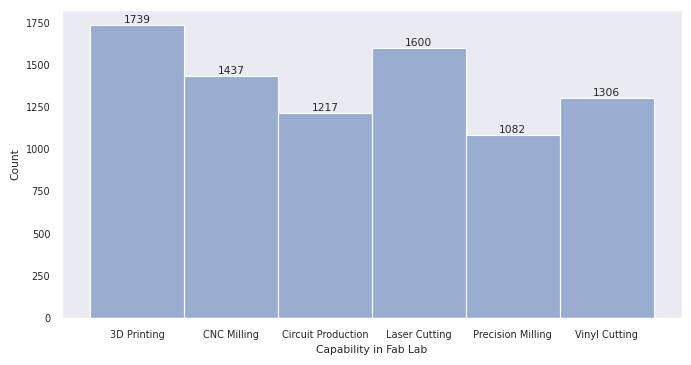

In [19]:
dfc = pd.DataFrame(list(capabilities_beauty.items()), columns=['Capability', 'Frequency'])
sns.set(rc={"figure.figsize":(8, 4)}) #width=3, #height=4
sns.set_style("dark")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 2.5})
p = sns.histplot(data=dfc, x='Capability', weights='Frequency', bins=len(capabilities_beauty), alpha = 0.5)
p.set(xlabel="Capability in Fab Lab")
p.bar_label(p.containers[0])
fig = p.get_figure()
plt.show()
fig.savefig('/home/oscar/Desktop/MINKE/D4.11/capabilities.png')

In [20]:
capabilities

{'three_d_printing': 1739,
 'cnc_milling': 1437,
 'circuit_production': 1217,
 'laser': 1600,
 'precision_milling': 1082,
 'vinyl_cutting': 1306}

In [21]:
for item in df_europe.index:
    df_europe.loc[item, 'capabilities_count'] = len(df_europe.loc[item, 'capabilities'])

/tmp/ipykernel_3006467/1354291088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europe.loc[item, 'capabilities_count'] = len(df_europe.loc[item, 'capabilities'])


In [22]:
df_europe_full_eqip = df_europe[df_europe.capabilities_count ==5]

## Fabacademy

In [23]:
active_labs = {'2022':25,
'2023':25,
'2024':27,
'2025':18,
'TOTAL': 44}

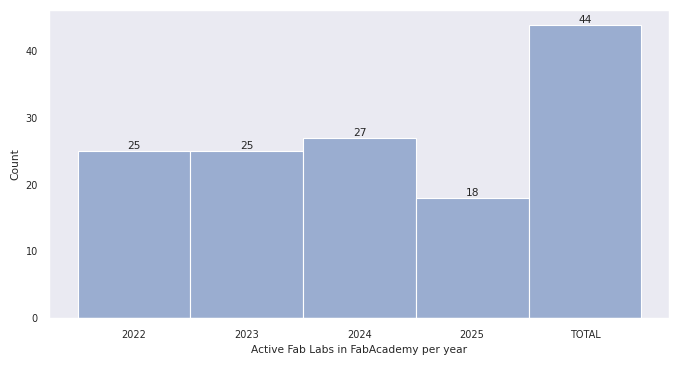

In [24]:
df = pd.DataFrame(list(active_labs.items()), columns=['Year', 'Count'])
sns.set(rc={"figure.figsize":(8, 4)}) #width=3, #height=4
sns.set_style("dark")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 2.5})
p = sns.histplot(data=df, x='Year', weights='Count', bins=len(capabilities_beauty), alpha = 0.5)
p.set(xlabel="Active Fab Labs in FabAcademy per year")
p.bar_label(p.containers[0])
fig = p.get_figure()
plt.show()
fig.savefig('exports/count.png')

## Coast

Code inspired by: https://www.jtrive.com/posts/distance-to-coastline/distance-to-coastline.html

In [25]:
import numpy as np
import pandas as pd
import geopandas as gpd

np.set_printoptions(suppress=True, precision=5)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

coastline_shp = "data/Europe_coastline_shapefile.zip"
eu_shp = "data/CNTR_RG_20M_2024_3035.shp.zip"

# Bounding box of lower 48 states. Remove Great Lakes.f
coast = gpd.read_file(coastline_shp)

# State boundaries.
states = gpd.read_file(eu_shp)

print(f"coast.shape : {coast.shape}")
print(f"states.shape: {states.shape}")

coast.head(10)

/home/oscar/.virtualenvs/scdata-python3.11-2/lib/python3.11/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'Europe_coastline_shapefile.zip': 'Europe_coastline' (default), 'Europe_coastline_poly'. Specify layer parameter to avoid this warning.
  result = read_func(


coast.shape : (1, 2)
states.shape: (260, 12)


,Shape_Leng,geometry
0,2.757363e+08,"MULTILINESTRING ((1482224.609 323020.147, 1481..."


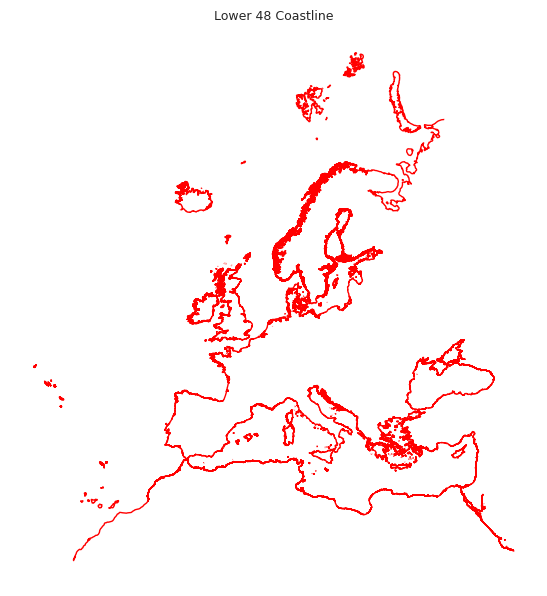

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 6), tight_layout=True)
ax.set_title("Lower 48 Coastline", fontsize=9)
coast.plot(ax=ax, edgecolor="red", linewidth=1.0)
ax.axis("off")
plt.show()

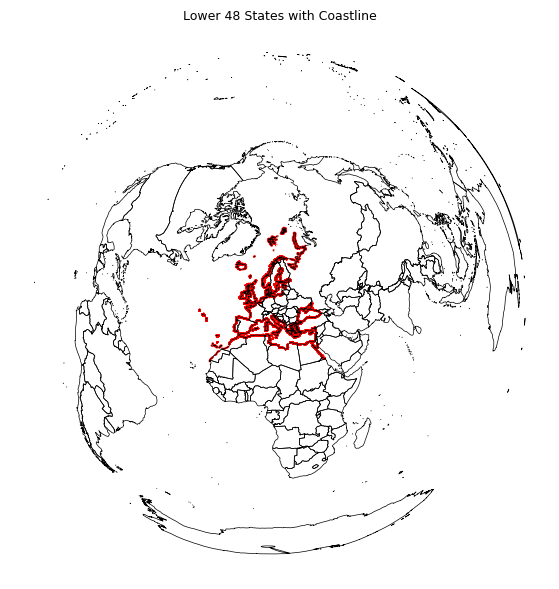

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), tight_layout=True)
ax.set_title("Lower 48 States with Coastline", fontsize=9)
coast.plot(ax=ax, edgecolor="red", linewidth=1.50, linestyle="--")
states.boundary.plot(ax=ax, edgecolor="black", linewidth=0.50)
ax.axis("off")
plt.show()

In [27]:
# Get bounding box for each state.
states["bbox"] = states.geometry.map(lambda gg: gg.envelope.bounds)

# Put coordinates in separate columns.
states[["lon0", "lat0", "lon1", "lat1"]] = pd.DataFrame(states.bbox.tolist(), index=states.index)

states.head()

,CNTR_ID,CNTR_NAME,NAME_ENGL,NAME_FREN,ISO3_CODE,SVRG_UN,CAPT,EU_STAT,EFTA_STAT,CC_STAT,NAME_GERM,geometry,bbox,lon0,lat0,lon1,lat1
0,AQ,Antarctica,Antarctica,Antarctique,ATA,Sovereignty unsettled,None,F,F,F,Antarktis,"MULTIPOLYGON (((4652262.991 -8814961.032, 4652...","(-2459185.4245999996, -9185874.6104, 12450223....",-2.459185e+06,-9.185875e+06,1.245022e+07,-6.010240e+06
1,AR,Argentina,Argentina,Argentine,ARG,UN Member State,Buenos Aires,F,F,F,Argentinien,"MULTIPOLYGON (((-1133821.732 -5966341.744, -11...","(-4906783.0226, -5972205.3409, -1133821.731700...",-4.906783e+06,-5.972205e+06,-1.133822e+06,-7.331034e+05
2,AS,American Samoa-Sāmoa Amelika,American Samoa,Samoa américaines,ASM,US Non-Self-Governing Territory,Pago Pago,F,F,F,Amerikanisch-Samoa,"MULTIPOLYGON (((4683447.898 15138543.63, 46520...","(4115763.8823000006, 15138394.935400002, 46834...",4.115764e+06,1.513839e+07,4.683448e+06,1.526521e+07
3,AD,Andorra,Andorra,Andorre,AND,UN Member State,Andorra la Vella,F,F,F,Andorra,"POLYGON ((3618228.674 2206417.971, 3626482.897...","(3618228.6744, 2188727.0557000004, 3645972.828...",3.618229e+06,2.188727e+06,3.645973e+06,2.209666e+06
4,AE,الإمارات العربية المتحدة,United Arab Emirates,Émirats arabes unis,ARE,UN Member State,Abu Dhabi,F,F,F,Vereinigten Arabischen Emirate,"MULTIPOLYGON (((8821469.774 1645680.105, 88306...","(8455392.5304, 1194597.8868000004, 8849683.515...",8.455393e+06,1.194598e+06,8.849684e+06,1.700150e+06


In [77]:
states

,CNTR_ID,CNTR_NAME,NAME_ENGL,NAME_FREN,ISO3_CODE,SVRG_UN,CAPT,EU_STAT,EFTA_STAT,CC_STAT,NAME_GERM,geometry,bbox,lon0,lat0,lon1,lat1
0,AQ,Antarctica,Antarctica,Antarctique,ATA,Sovereignty unsettled,None,F,F,F,Antarktis,"MULTIPOLYGON (((4652262.991 -8814961.032, 4652...","(-2459185.4245999996, -9185874.6104, 12450223....",-2.459185e+06,-9.185875e+06,1.245022e+07,-6.010240e+06
1,AR,Argentina,Argentina,Argentine,ARG,UN Member State,Buenos Aires,F,F,F,Argentinien,"MULTIPOLYGON (((-1133821.732 -5966341.744, -11...","(-4906783.0226, -5972205.3409, -1133821.731700...",-4.906783e+06,-5.972205e+06,-1.133822e+06,-7.331034e+05
2,AS,American Samoa-Sāmoa Amelika,American Samoa,Samoa américaines,ASM,US Non-Self-Governing Territory,Pago Pago,F,F,F,Amerikanisch-Samoa,"MULTIPOLYGON (((4683447.898 15138543.63, 46520...","(4115763.8823000006, 15138394.935400002, 46834...",4.115764e+06,1.513839e+07,4.683448e+06,1.526521e+07
3,AD,Andorra,Andorra,Andorre,AND,UN Member State,Andorra la Vella,F,F,F,Andorra,"POLYGON ((3618228.674 2206417.971, 3626482.897...","(3618228.6744, 2188727.0557000004, 3645972.828...",3.618229e+06,2.188727e+06,3.645973e+06,2.209666e+06
4,AE,الإمارات العربية المتحدة,United Arab Emirates,Émirats arabes unis,ARE,UN Member State,Abu Dhabi,F,F,F,Vereinigten Arabischen Emirate,"MULTIPOLYGON (((8821469.774 1645680.105, 88306...","(8455392.5304, 1194597.8868000004, 8849683.515...",8.455393e+06,1.194598e+06,8.849684e+06,1.700150e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,ZA,Suid-Afrika-South Africa-Sewula Afrika-Afrika-...,South Africa,Afrique du Sud,ZAF,UN Member State,Pretoria (Adm.),F,F,F,Südafrika,"MULTIPOLYGON (((7573799.931 -6086743.695, 7564...","(5146219.485400001, -6121299.2001, 7573799.931...",5.146219e+06,-6.121299e+06,7.573800e+06,-4.188087e+06
256,UK,United Kingdom,United Kingdom,Royaume-Uni,GBR,UN Member State,London,F,F,F,Vereinigtes Königreich,"MULTIPOLYGON (((3563337.824 4012251.118, 35568...","(3158119.1456000004, 3097591.6472999994, 37618...",3.158119e+06,3.097592e+06,3.761866e+06,4.232321e+06
257,UM,United States Minor Outlying Islands,United States Minor Outlying Islands,Îles mineures éloignées des États-Unis,UMI,US Territory,None,F,F,F,Kleineren Amerikanischen Überseeinseln,"MULTIPOLYGON (((5418392.498 12888238.705, 5430...","(2504274.8158, 12883032.2249, 5443726.0505, 14...",2.504275e+06,1.288303e+07,5.443726e+06,1.420173e+07
258,ZM,Zambia,Zambia,Zambie,ZMB,UN Member State,Lusaka,F,F,F,Sambia,"POLYGON ((6943648.308 -2877615.955, 6973873.87...","(5858514.8444, -3927949.8455999997, 7319759.78...",5.858515e+06,-3.927950e+06,7.319760e+06,-2.877616e+06


In [28]:
fablab_locations = df_europe.loc[:, ['latitude', 'longitude']]
#fablab_locations = df_europe_full_eqip.loc[:, ['latitude', 'longitude']]

In [29]:
fablab_locations.rename(columns={'latitude':'lat', 'longitude':'lon'}, inplace=True)

In [30]:
fablab_locations.dropna(inplace=True)

In [31]:
# Create GeoDataFrame.
points = gpd.GeoDataFrame(
    fablab_locations,
    geometry=gpd.points_from_xy(fablab_locations.lon, fablab_locations.lat),
    crs="EPSG:4326"
)

points.head(10)

,lat,lon,geometry
4,-29.139272,-51.171602,POINT (-51.1716 -29.13927)
6,8.557167,76.880297,POINT (76.8803 8.55717)
7,50.430186,30.451312,POINT (30.45131 50.43019)
9,32.488808,35.976273,POINT (35.97627 32.48881)
10,-23.542017,-46.635780,POINT (-46.63578 -23.54202)
11,3.203644,101.447968,POINT (101.44797 3.20364)
12,40.446191,-80.018821,POINT (-80.01882 40.44619)
13,65.661713,-20.291235,POINT (-20.29123 65.66171)
14,-11.484915,-77.183799,POINT (-77.1838 -11.48491)
15,-12.032757,-75.237083,POINT (-75.23708 -12.03276)


In [32]:
# Convert from GPS to  Conus Albers. 
points = points.to_crs("EPSG:5069")
coast = coast.to_crs("EPSG:5069")

# Perform spatial join. Covert meters to miles. 
gdf = gpd.sjoin_nearest(points, coast, how="left", distance_col="meters")
gdf["miles"] = gdf["meters"] * 0.000621371
gdf["km"] = gdf["meters"] * 0.001

# Get min, max and average distance to coast line.
min_dist = gdf.km.min()
max_dist = gdf.km.max()
avg_dist = gdf.km.mean()

print(f"min. distance to coastline: {min_dist}")
print(f"max. distance to coastline: {max_dist}")
print(f"avg. distance to coastline: {avg_dist}")

min. distance to coastline: 0.010516164855468394
max. distance to coastline: 18267.63766239061
avg. distance to coastline: 3636.321551156807


In [33]:
gdf

,lat,lon,geometry,index_right,Shape_Leng,meters,miles,km
4,-29.139272,-51.171602,POINT (6683592.408 -3173159.274),0,2.757363e+08,6.297941e+06,3913.357959,6297.941100
6,8.557167,76.880297,POINT (11096504.804 12743088.117),0,2.757363e+08,4.694272e+06,2916.884662,4694.272282
7,50.430186,30.451312,POINT (6686506.738 8291260.821),0,2.757363e+08,4.044816e+05,251.333127,404.481584
9,32.488808,35.976273,POINT (8735914.909 8320710.343),0,2.757363e+08,9.413319e+04,58.491633,94.133188
10,-23.542017,-46.635780,POINT (7099856.474 -2487434.809),0,2.757363e+08,5.572876e+06,3462.823523,5572.875984
...,...,...,...,...,...,...,...,...
2624,29.959218,31.252782,POINT (8919122.418 7824019.36),0,2.757363e+08,1.095770e+05,68.087940,109.576951
2625,43.405296,5.051129,POINT (6695517.56 6205904.746),0,2.757363e+08,3.942227e+03,2.449585,3.942227
2626,13.636209,123.199228,POINT (-10883035.645 8955655.385),0,2.757363e+08,1.478688e+07,9188.141465,14786.884912
2627,31.971558,35.832745,POINT (8790162.911 8296993.792),0,2.757363e+08,9.854613e+04,61.233710,98.546134


In [34]:
# Create dfgroups DataFrame. 
dfgroups = pd.DataFrame({
    "coast": ["very close", "close", "medium", "far"],
    "km": [0., 5., 25., 50.]
})

# Assign risk group to each policy location.
gdf = gdf.sort_values("km", ascending=True)
gdf = pd.merge_asof(gdf, dfgroups, on="km", direction="backward")

gdf.head(10)

,lat,lon,geometry,index_right,Shape_Leng,meters,miles,km,coast
0,35.518304,24.038359,POINT (8142930.956 7341382.945),0,2.757363e+08,10.516165,0.006534,0.010516,very close
1,38.228865,15.637450,POINT (7602523.834 6749737.631),0,2.757363e+08,29.646572,0.018422,0.029647,very close
2,65.661713,-20.291235,POINT (3810969.238 6202720.942),0,2.757363e+08,32.638731,0.020281,0.032639,very close
3,63.442734,-20.269152,POINT (3960248.885 6058575.601),0,2.757363e+08,39.992954,0.024850,0.039993,very close
4,35.898675,14.508194,POINT (7803873.471 6556040.173),0,2.757363e+08,40.879142,0.025401,0.040879,very close
5,35.338910,33.325210,POINT (8376182.495 8144037.657),0,2.757363e+08,47.549500,0.029546,0.047550,very close
6,59.435813,10.662928,POINT (5345639.666 7357059.53),0,2.757363e+08,47.926876,0.029780,0.047927,very close
7,66.046885,-17.344575,POINT (3898819.001 6346396.323),0,2.757363e+08,48.175713,0.029935,0.048176,very close
8,45.654969,13.770402,POINT (6779220.802 6936223.391),0,2.757363e+08,49.512463,0.030766,0.049512,very close
9,38.440250,27.151735,POINT (7908239.868 7698368.193),0,2.757363e+08,69.434428,0.043145,0.069434,very close


In [35]:
gdf.coast.value_counts().sort_index()

coast
close           92
far           1268
medium          58
very close     161
Name: count, dtype: int64

In [38]:
# Colors for each group.
dcolors = {
    "very close": "#f4000288",
    "close": "#ff721f77",
    "medium": "#fafc1566",
    "far": "#268a6d11"
}

gdf["color"] = gdf["coast"].map(dcolors)

m = folium.Map()

for tt in gdf.itertuples():
    lat, lon, color = tt.lat, tt.lon, tt.color
    folium.CircleMarker(
        location=[lat, lon],
        radius=6, 
        color=color, 
        fill_color=color, 
        fill=True,
        fill_opacity=1
        ).add_to(m)

folium.map.LayerControl('topleft', collapsed= False).add_to(m)

m